# Effective Graph Paper
Code to generate "Figure 4 - Perturbations"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import cana
import matplotlib.pyplot as plt

In [14]:
corr_mat  = np.load("CorrelationMatrixN30K2B04.npy")
corr_mat.shape

(3, 10, 10, 10)

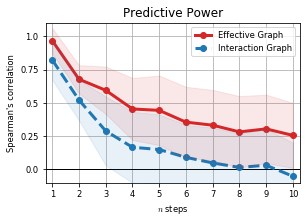

In [55]:
fig, ax = plt.subplots(1,1,figsize=(4.25,3), sharex=True, sharey=True)
#
n_steps = 10
colors = ['#d62728', '#1f77b4']
labels = [r"Effective Graph", r"Interaction Graph"]
ls = ['-','--']
for ip in [0,1]:
    corrmean = np.nanmean(corr_mat[ip], axis=(0,1))
    corrstd = np.nanstd(corr_mat[ip], axis=(0,1))
                        
    ax.fill_between( np.arange(1, n_steps + 1), corrmean-corrstd, corrmean + corrstd , color=colors[ip], alpha=0.1,
            zorder=10-ip)                 
    ax.plot(np.arange(1, n_steps + 1), corrmean, c=colors[ip], label=labels[ip],
            marker='o', ms=6, lw=3, ls=ls[ip], zorder=5-ip)
    
ax.axhline(0, c='#000000', lw=1, zorder=2)

ax.set_title("Predictive Power")
ax.set_ylabel("Spearman's correlation", fontsize='small')
ax.set_xlabel("$n$ steps", fontsize='small')
ax.set_xticks(np.arange(1, 11, 1))
ax.set_xticklabels(np.arange(1, 11, 1), fontsize='small')
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], fontsize='small')
ax.set_xlim(0.75, 10.25)
ax.set_ylim(-0.1, 1.1)
ax.grid(zorder=1)
ax.legend(loc=0, fontsize='small')

plt.subplots_adjust(left=0.14, right=0.97, bottom=0.16, top=0.9, wspace=0.2, hspace=0.35)
plt.savefig("Perturbations.pdf")
plt.show()